In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from DaySim import DaysimSummary

In [2]:
report = DaysimSummary()

runVehAvailability = True, loading data...
runWrkSchLocationChoice = True, loading data...
runTripMode = True, loading data...
runTourMode = True, loading data...
runTripDestination = True, loading data...
runTourDestination = True, loading data...
runTripTOD = True, loading data...
runTourTOD = True, loading data...
runDayPattern = True, loading data...


## Vehicle Availability

In [3]:
# by household income
report.summary_vehavail("inccat")

hhvehcat,0,1,2,3,4
inccat,,,,,
0K-15K,7038,10966,3412,803,231
15K-50K,3261,27243,21048,9504,5860
50K-75K,332,4532,13451,8087,5611
>75K,627,3984,20146,14356,12611


In [4]:
# by county
report.summary_vehavail("hhcounty")

hhvehcat,0,1,2,3,4
hhcounty,,,,,
1,15706,41324,44785,24930,18274
2,1024,6231,8339,4941,3896
3,126,922,415,221,181
4,767,4210,5031,2728,1967


In [5]:
# by household drivers
report.summary_vehavail("hh16cat")

hhvehcat,0,1,2,3,4
hh16cat,,,,,
0,27,3,0,0,0
1,14981,43836,6431,1439,0
2,2117,7968,46626,17675,9792
3,213,880,4818,9851,6046
4,285,0,695,3855,8480


## Work/School Location

<BarContainer object of 49 artists>

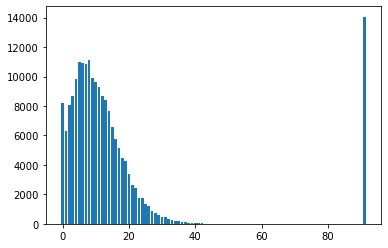

In [6]:
# work trip length
df = report.summary_wrkschloc_trip_length("wrkr")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['wrkdistcat'],height=(df['FT']+df['PT']+df['NotFTPT']))

<BarContainer object of 90 artists>

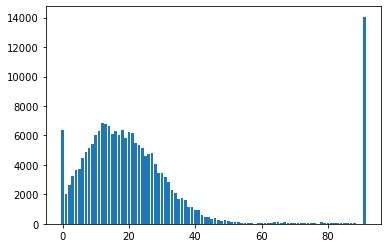

In [7]:
# work trip duration
df = report.summary_wrkschloc_trip_duration("wrkr")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['wrktimecat'],height=(df['FT']+df['PT']+df['NotFTPT']))

In [8]:
# work trip county flow
report.summary_wrkschloc_county_flow("wrkr")

pwcounty,1.0,2.0,3.0,4.0,13.0
hhcounty,,,,,
1,142284,2606,92,1394,7501
2,14232,7953,58,861,4734
3,1234,36,73,37,111
4,8460,2251,60,2252,1713


In [9]:
# work from home
report.summary_wrkschloc_at_home("wfh")

wrkrtyp,FT,PT,NotFTPT
hhcounty,,,
1,2783,1076,310
2,632,243,16
3,33,17,4
4,468,181,17


<BarContainer object of 45 artists>

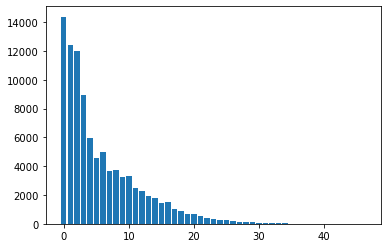

In [10]:
# school trip length
df = report.summary_wrkschloc_trip_length("stud")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['schdistcat'],height=(df['Ch515']+df['Stu16']+df['UniStu']))

<BarContainer object of 88 artists>

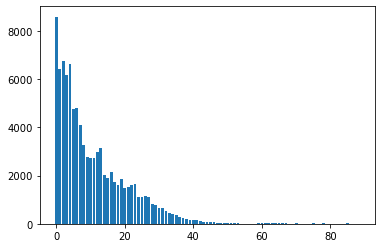

In [11]:
# school trip duration
df = report.summary_wrkschloc_trip_duration("stud")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['schtimecat'],height=(df['Ch515']+df['Stu16']+df['UniStu']))

In [12]:
# school trip county flow
report.summary_wrkschloc_county_flow("stud")

pscounty,1.0,2.0,3.0,4.0
hhcounty,,,,
1,69445,1514,307,934
2,5442,7621,23,771
3,719,26,244,69
4,2962,824,88,3634


In [13]:
# school at home
report.summary_wrkschloc_at_home("sfh")

stutyp,Ch515,Stu16,UniStu
hhcounty,,,
1,2468,447,959
2,470,48,72
3,10,3,3
4,222,29,52


## Trip Mode

In [14]:
# Work
report.summary_trip_mode(purpose=1) 
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

tourmode,Drive Alone,Shared Ride 2,Shared Ride 3+,Drive-Transit,Walk-Transit,Bike,Walk,School Bus
tripmode,,,,,,,,
Drive Alone,347178.0,39341.0,16494.0,726.0,19.0,0.0,0.0,0.0
Shared Ride 2,0.0,39841.0,7813.0,66.0,24.0,0.0,0.0,0.0
Shared Ride 3+,0.0,0.0,27252.0,0.0,9.0,0.0,0.0,0.0
Transit-local bus,0.0,0.0,0.0,582.0,411.0,0.0,0.0,0.0
Transit-light rail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-premium bus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-commuter rail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-ferry,0.0,0.0,0.0,4.0,24.0,0.0,0.0,0.0
School Bus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tour Mode

In [15]:
# Work
report.summary_tour_mode(purpose=1)
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

vehcat,0-Veh HHs,>0-Veh HHs
tourmode,,
Drive Alone,0.0,121143.0
Shared Ride 2,309.0,21159.0
Shared Ride 3+,189.0,12724.0
Drive-Transit,27.0,266.0
Walk-Transit,99.0,169.0
Bike,102.0,84.0
Walk,781.0,984.0
School Bus,0.0,0.0


## Trip Destination

<BarContainer object of 48 artists>

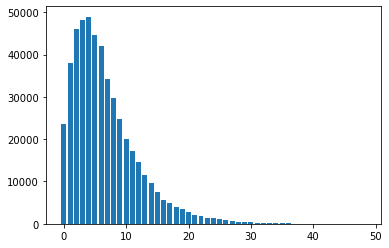

In [16]:
# trip length by trip purpose
df = report.summary_trip_destination("distcat").reset_index()
plt.bar(x=df['distcat'],height=df[0]) 
# 0-non/home  1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 90 artists>

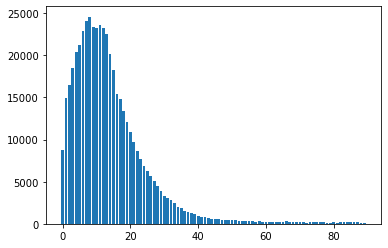

In [17]:
# trip duration by trip purpose
df = report.summary_trip_destination("timecat").reset_index()
plt.bar(x=df['timecat'],height=df[0])
# 0-non/home  1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

## Tour Destination

<BarContainer object of 49 artists>

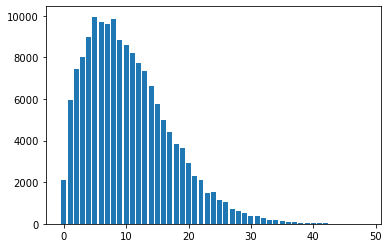

In [18]:
# tour length by tour purpose
df = report.summary_tour_destination("distcat").reset_index()
plt.bar(x=df['distcat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

<BarContainer object of 90 artists>

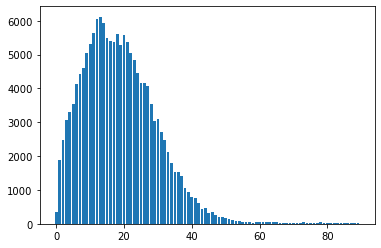

In [19]:
# tour duration by tour purpose
df = report.summary_tour_destination("timecat").reset_index()
plt.bar(x=df['timecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

In [20]:
# tour county flow by tour purpose
report.summary_tour_destination_county_flow(purpose=1)
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

dcounty,1,2,3,4
ocounty,,,,
1,121026,2496,78,1299
2,13297,6377,46,833
3,1019,37,11,34
4,7847,2093,63,1480


## Trip Time of Day

<BarContainer object of 43 artists>

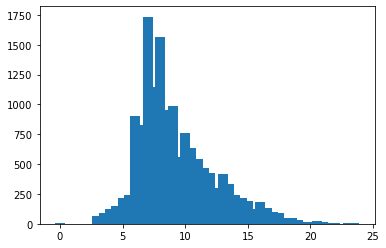

In [21]:
# Trip arrival time at stop location - outbound (first) half-tour
df = report.summary_trip_tod("arrtimecat",filter_by_var="arrflag").reset_index()
plt.bar(x=df['arrtimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 43 artists>

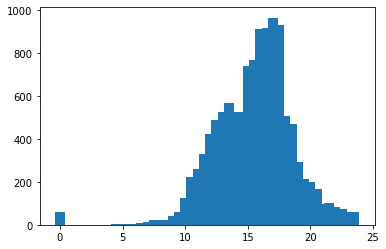

In [22]:
# Trip departure time at stop location - return (second) half-tour
df = report.summary_trip_tod("deptimecat",filter_by_var="depflag").reset_index()
plt.bar(x=df['deptimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 25 artists>

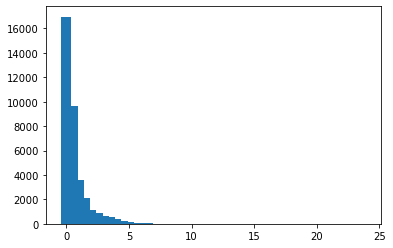

In [23]:
# Duration at stop location - both half-tours
df = report.summary_trip_tod("durdestcat",filter_by_var="durflag").reset_index()
plt.bar(x=df['durdestcat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 43 artists>

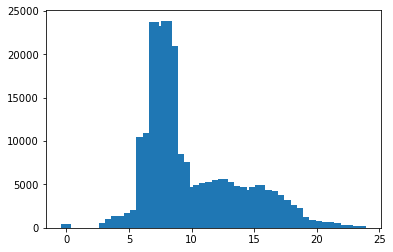

In [24]:
# Trip arrival time All
df = report.summary_trip_tod("arrtimecat",filter_by_var=False).reset_index()
plt.bar(x=df['arrtimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 43 artists>

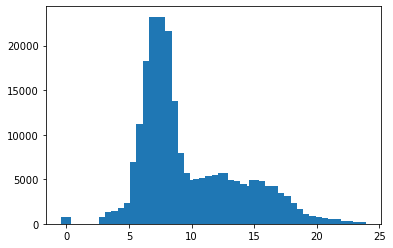

In [25]:
# Trip departure time All
df = report.summary_trip_tod("deptimecat",filter_by_var=False).reset_index()
plt.bar(x=df['deptimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

## Tour Time of Day

<BarContainer object of 43 artists>

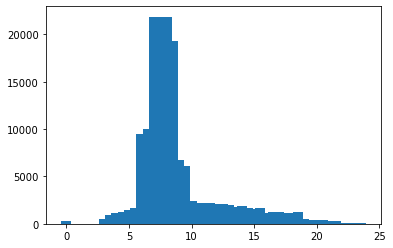

In [26]:
# arrival time all trip purposes
df = report.summary_tour_tod("arrtimecat").reset_index()
plt.bar(x=df['arrtimecat'],height=df[1]) 
# 1 Work 2 School 3 Other 4 Workbased

<BarContainer object of 43 artists>

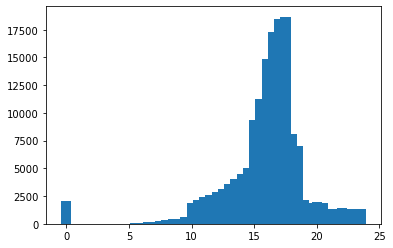

In [27]:
# departure time all trip purposes
df = report.summary_tour_tod("deptimecat").reset_index()
plt.bar(x=df['deptimecat'],height=df[1]) 
# 1 Work 2 School 3 Other 4 Workbased

<BarContainer object of 38 artists>

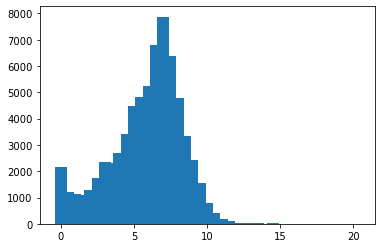

In [28]:
# duration all trip purposes
df = report.summary_tour_tod("durdestcat").reset_index()
plt.bar(x=df['durdestcat'],height=df[2]) 
# 1 Work 2 School 3 Other 4 Workbased

In [29]:
# arrival time by trip purpose by person type
report.summary_tour_tod_purpose("arrtimecat", purpose=2).reset_index()
# purpose: 1 Work 2 School 3 Other 4 Workbased
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,arrtimecat,1,2,3,4,5,6,7,8
0,3.0,0,0.0,0.0,0.0,0,1,0,0.0
1,3.5,0,0.0,0.0,0.0,0,0,1,0.0
2,4.0,0,0.0,0.0,0.0,0,1,1,0.0
3,4.5,0,0.0,0.0,0.0,0,0,2,0.0
4,5.0,0,0.0,0.0,0.0,0,0,2,0.0
5,5.5,0,0.0,0.0,0.0,1,4,20,0.0
6,6.0,3,0.0,0.0,0.0,21,208,639,0.0
7,6.5,5,0.0,0.0,0.0,36,218,759,0.0
8,7.0,72,0.0,0.0,0.0,667,2741,10465,0.0
9,7.5,103,0.0,0.0,0.0,751,2115,9617,0.0


In [30]:
# departure time by trip purpose by person type
report.summary_tour_tod_purpose("deptimecat", purpose=2).reset_index()
# purpose: 1 Work 2 School 3 Other 4 Workbased
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,deptimecat,1,2,3,4,5,6,7,8
0,7.0,0,0.0,0.0,0.0,7,93,100,0.0
1,7.5,3,0.0,0.0,0.0,13,86,152,0.0
2,8.0,1,0.0,0.0,0.0,17,46,158,0.0
3,8.5,1,0.0,0.0,0.0,23,31,165,0.0
4,9.0,0,0.0,0.0,0.0,24,21,129,0.0
5,9.5,1,0.0,0.0,0.0,35,21,155,0.0
6,10.0,2,0.0,0.0,0.0,127,111,805,0.0
7,10.5,7,0.0,0.0,0.0,140,112,928,0.0
8,11.0,12,0.0,0.0,0.0,146,133,1105,0.0
9,11.5,3,0.0,0.0,0.0,161,159,1219,0.0


## Person Day Pattern

In [31]:
# number of tours by person type
report.summary_day_pattern_num_of_tours()
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7
tottours,,,,,,,
0,19313,1799,19373,16508,10467,4206,1412
1,99794,11449,25127,36725,8910,8153,35109
2,33443,8311,9377,17476,3416,2962,14931
3,7386,3634,3023,8439,1039,625,3393


In [32]:
# tour/stop combinations by person type
report.summary_day_pattern_tour_stops()
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: tours/stops
# 0 0/0
# 1 1/0
# 2 1/1
# 3 1/2
# 4 1/3+
# 5 2/0
# 6 2/1
# 7 2/2
# 8 2/3+
# 9 3+/0
# 10 3+/1
# 11 3+/2
# 12 3+/3+

pptyp,1,2,3,4,5,6,7
tourstop,,,,,,,
0,19313,1799,19373,16508,10467,4206,1412
1,15545,10,6812,7266,4013,3668,5346
2,29694,180,8166,11188,3042,2394,11094
3,28114,1906,7372,12686,1338,1464,10023
4,26441,9353,2777,5585,517,627,8646
5,4360,27,2078,2834,1128,946,2330
6,10232,454,3000,4881,1315,929,5025
7,10703,2447,3069,6449,694,733,4552
8,8148,5383,1230,3312,279,354,3024


In [33]:
# tour/stop combinations by purpose by person type
report.summary_day_pattern_tour_stops_by_purpose(purpose="wktostp")
# purpose: "wktostp", "sctostp", "estostp", "pbtostp", "shtostp", "mlstops", "sotostp"
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: tours/stops
# 1 0/0
# 2 0/1+
# 3 1+/0
# 4 1+/1+

pptyp,1,2,3,4,5,6,7
wktostp,,,,,,,
1,32831,8081,56900,79148,21436,14082,54845
2,810,0,0,0,678,1085,0
3,84761,13440,0,0,1242,532,0
4,41534,3672,0,0,476,247,0


In [34]:
# tours by purpose by person type
report.summary_day_pattern_tours_by_purpose(purpose="wktopt")
# purpose: "wktopt", "sctopt", "estopt", "pbtopt", "shtopt", "mltopt", "sotopt"
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: 0,1,2,3+

pptyp,1,2,3,4,5,6,7
wktopt,,,,,,,
0,33641,8081,56900,79148,22114,15167,54845
1,116466,15528,0,0,1613,700,0
2,9391,1494,0,0,103,74,0
3,438,90,0,0,2,5,0


In [35]:
# number of subtours (work tours only)
report.summary_day_pattern_subtours()
# columns: 1-FT 2-Other
# index: 0,1,2,3+

ftwind,1,2
stcat,,
0,123761,18877
1,17908,2877
2,987,136
3,84,9


In [36]:
# number of subtours (work tours only) by purpose
report.summary_day_pattern_subtours_by_purpose()
# columns: 1-FT 2-Other
# index :1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational

ftwind,1,2
pdpurp,,
1,6178.0,425.0
2,0.0,0.0
3,521.0,178.0
4,3686.0,1039.0
5,1075.0,291.0
6,7743.0,1053.0
7,949.0,207.0


In [37]:
# estimated tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
stopscat,,,,,,,
0,64014,29533,27249,47294,26066,24697,32829
1,50454,20152,19113,22432,13833,8185,11917
2,28394,11261,10277,9490,6430,2736,4126
3,12889,5001,4324,3078,2335,834,1260
4,5522,1931,1679,780,652,195,336
5,2146,647,555,137,136,29,61
6,1220,291,243,21,27,7,17


In [38]:
# estimated outbound tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("h1stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
h1stopscat,,,,,,,
0,112508,49772,41726,62905,35556,29674,40478
1,36950,14117,15124,15492,10079,5329,7837
2,10598,3654,4743,3818,2942,1334,1748
3,3340,980,1405,875,753,303,399
4,922,239,334,128,121,40,73
5,211,44,75,13,22,3,8
6,110,10,33,1,6,0,3


In [39]:
# estimated return tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("h2stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
h2stopscat,,,,,,,
0,88671,38177,38977,60527,34867,29834,39942
1,50205,20321,17946,18045,11557,5813,8761
2,17909,7473,5030,3909,2512,902,1526
3,5386,2049,1142,638,467,112,267
4,1845,601,268,103,66,19,43
5,335,118,43,7,8,2,6
6,288,77,34,3,2,1,1


In [40]:
# estimated total tours by purpose by person type
report.summary_day_pattern_tours_by_tour_purpose("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

pptyp,1,2,3,4,5,6,7
pdpurp2,,,,,,,
1,136562,18786,0,0,1825,863,0
2,1172,0,0,0,6810,10483,50351
3,11809,7986,5213,28883,3374,1058,4418
4,11774,4181,18966,32585,3037,1027,6937
5,9472,3162,11820,18907,872,780,3100
6,8570,2087,6140,6715,1625,686,2064
7,10644,3711,11441,12149,1534,1164,8747
8,20152,2945,0,0,160,88,0


In [41]:
# estimated total tours by purpose by household income
report.summary_day_pattern_tours_by_tour_purpose("inccat")
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

inccat,0K-15K,15K-50K,50K-75K,>75K
pdpurp2,,,,
1,5145,43963,35550,72297
2,6292,19671,14274,26997
3,7303,20471,12379,20925
4,9246,29150,14179,22803
5,5791,18130,8657,13930
6,2708,9643,5515,8891
7,4735,16096,9451,17705
8,700,6144,5134,11250


In [42]:
# estimated total tours by purpose by auto sufficiency
report.summary_day_pattern_tours_by_tour_purpose("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

vehsuf,1,2,3,4
pdpurp2,,,,
1,1507,16301,96511,43717
2,2831,12379,38519,15087
3,4244,12473,33714,12310
4,6058,12115,43542,16792
5,3642,7295,26814,10362
6,1824,3723,15926,6414
7,3025,7133,27934,11298
8,201,2096,14488,6560


In [43]:
# estimated total tours by purpose by county
report.summary_day_pattern_tours_by_tour_purpose("hhcounty")
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

hhcounty,1,2,3,4
pdpurp2,,,,
1,124899,20553,1101,11483
2,51362,10915,562,5977
3,47684,9293,354,5410
4,60400,10852,635,6620
5,36918,6745,333,4117
6,21973,3647,200,2067
7,38149,6835,344,4062
8,18546,2924,173,1702


In [44]:
# estimated total stops by purpose by person type
report.summary_day_pattern_stops_by_stop_purpose_agg("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7,purpose
1,42344,3672,0,0,1154,1332,0,wkstops
1,68,0,0,0,417,990,4587,scstops
1,30562,10229,1738,8683,2573,2353,14345,esstops
1,62822,21825,21285,41870,4279,2456,30755,pbstops
1,58941,21131,17719,33717,1587,2011,15539,shstops
1,29865,5323,4212,5820,1303,1181,4720,mlstops
1,16253,4575,4006,5978,760,1256,17537,sostops


In [45]:
# estimated total stops by purpose by household income
report.summary_day_pattern_stops_by_stop_purpose_agg("inccat")

inccat,0K-15K,15K-50K,50K-75K,>75K,purpose
1,1608,13533,10667,22236,wkstops
1,427,1607,1351,2629,scstops
1,4816,19037,15620,30227,esstops
1,15767,59456,36806,69459,pbstops
1,12624,49294,30381,55435,shstops
1,2983,14924,11348,22397,mlstops
1,3253,13751,10216,22605,sostops


In [46]:
# estimated total stops by purpose by auto sufficiency
report.summary_day_pattern_stops_by_stop_purpose_agg("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers

vehsuf,1,2,3,4,purpose
1,734,5008,29521,13239,wkstops
1,126,1066,3510,1360,scstops
1,2118,10708,40772,16885,esstops
1,8474,25111,107094,44613,pbstops
1,6636,19352,87949,36708,shstops
1,1457,5892,31493,13582,mlstops
1,1343,6456,29820,12746,sostops


In [47]:
# estimated total stops by purpose by county
report.summary_day_pattern_stops_by_stop_purpose_agg("hhcounty")

hhcounty,1,2,3,4,purpose
1,38587,6116,368,3431,wkstops
1,4488,996,32,546,scstops
1,54434,10042,441,5566,esstops
1,141977,26537,1357,15421,pbstops
1,116046,20998,1122,12479,shstops
1,40322,7336,440,4326,mlstops
1,37874,7885,354,4252,sostops


In [48]:
# estimated total trips by purpose by person type
report.summary_day_pattern_trips_by_destination_purpose("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7
dpurp,,,,,,,
1,194389,25152,0,0,3148,1890,0
2,1196,0,0,0,7021,10906,52557
3,44492,17621,6313,35326,6314,3664,20499
4,66993,25182,39852,75061,7272,3100,33501
5,52031,19894,26954,48311,2147,2257,14632
6,28631,5831,8676,10181,2516,1429,4919
7,22331,7116,14124,16462,2112,2059,21142
8,190003,39913,53580,99239,19077,16061,75617
10,502,66,0,0,12,6,0


In [49]:
# estimated total trips by purpose by household income
report.summary_day_pattern_trips_by_destination_purpose("inccat")

inccat,0K-15K,15K-50K,50K-75K,>75K
dpurp,,,,
1,7291,62286,50072,103362
2,6481,20432,14891,28277
3,11792,39495,28499,52174
4,24224,85391,48300,86260
5,16176,57283,32369,56466
6,4609,19290,12946,23698
7,6992,25906,16788,33880
8,41220,157124,100005,183548
10,22,128,114,322


In [50]:
# estimated total trips by purpose by auto sufficiency
report.summary_day_pattern_trips_by_destination_purpose("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers

vehsuf,1,2,3,4
dpurp,,,,
1,2229,22786,137441,62123
2,2882,12869,40169,15760
3,5760,23778,75242,29449
4,13793,36309,143210,57649
5,8894,23094,95491,38747
6,2706,7532,36634,15311
7,3921,11701,49357,20367
8,23131,71419,282960,115980
10,54,38,340,154


In [51]:
# estimated total trips by purpose by county
report.summary_day_pattern_trips_by_destination_purpose("ocounty")

ocounty,1,2,3,4
dpurp,,,,
1,188031,23896,985,11667
2,54615,10869,470,5726
3,106134,18757,462,8876
4,199415,34258,1139,16149
5,132840,22444,716,10226
6,51000,7524,258,3401
7,67075,11947,406,5918
8,401689,66286,1484,24031
10,576,9,1,0
